# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | malvan
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | phrai bueng
Processing Record 7 of Set 1 | hammerfest
Processing Record 8 of Set 1 | belonia
Processing Record 9 of Set 1 | kayes
Processing Record 10 of Set 1 | katsuura
Processing Record 11 of Set 1 | new plymouth
Processing Record 12 of Set 1 | lihue
Processing Record 13 of Set 1 | songea
Processing Record 14 of Set 1 | ghanzi
Processing Record 15 of Set 1 | mathba
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | ar rass
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | asau
Processing Record 

Processing Record 40 of Set 4 | lycksele
Processing Record 41 of Set 4 | huarmey
Processing Record 42 of Set 4 | newman
Processing Record 43 of Set 4 | general mosconi
Processing Record 44 of Set 4 | georgetown
Processing Record 45 of Set 4 | bandipura
Processing Record 46 of Set 4 | tamanrasset
Processing Record 47 of Set 4 | bikenibeu village
Processing Record 48 of Set 4 | laguna
Processing Record 49 of Set 4 | namibe
Processing Record 0 of Set 5 | hazard
Processing Record 1 of Set 5 | gueltat zemmour
City not found. Skipping...
Processing Record 2 of Set 5 | anatuya
Processing Record 3 of Set 5 | siwa oasis
Processing Record 4 of Set 5 | carnarvon
Processing Record 5 of Set 5 | tabas
Processing Record 6 of Set 5 | port alfred
Processing Record 7 of Set 5 | ola
Processing Record 8 of Set 5 | thunder bay
Processing Record 9 of Set 5 | szydlowiec
Processing Record 10 of Set 5 | fale old settlement
Processing Record 11 of Set 5 | toledo
Processing Record 12 of Set 5 | talcahuano
Proces

Processing Record 34 of Set 8 | borongan
Processing Record 35 of Set 8 | san
Processing Record 36 of Set 8 | new norfolk
Processing Record 37 of Set 8 | mount pearl
Processing Record 38 of Set 8 | broome
Processing Record 39 of Set 8 | devils lake
Processing Record 40 of Set 8 | szarvas
Processing Record 41 of Set 8 | san julian
Processing Record 42 of Set 8 | bolobo
Processing Record 43 of Set 8 | boyolangu
Processing Record 44 of Set 8 | padang
Processing Record 45 of Set 8 | paita
Processing Record 46 of Set 8 | igarka
Processing Record 47 of Set 8 | pacific grove
Processing Record 48 of Set 8 | umri
Processing Record 49 of Set 8 | yukhnov
Processing Record 0 of Set 9 | rio grande
Processing Record 1 of Set 9 | kapa'a
Processing Record 2 of Set 9 | ordynskoye
Processing Record 3 of Set 9 | prince rupert
Processing Record 4 of Set 9 | xianning
Processing Record 5 of Set 9 | eisen
Processing Record 6 of Set 9 | lautoka
Processing Record 7 of Set 9 | riosucio
Processing Record 8 of Set

Processing Record 27 of Set 12 | al bardiyah
Processing Record 28 of Set 12 | ponta delgada
Processing Record 29 of Set 12 | prince george
Processing Record 30 of Set 12 | saint-pierre
Processing Record 31 of Set 12 | vitoria da conquista
-----------------------------
Data Retrieval Complete      
-----------------------------


In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,41.88,89,100,17.94,TF,1699827893
1,malvan,16.0667,73.4667,79.50,72,100,4.72,IN,1699828220
2,isafjordur,66.0755,-23.1240,35.56,82,100,3.91,IS,1699827896
3,hithadhoo,-0.6000,73.0833,80.89,80,90,5.59,MV,1699827877
4,bilibino,68.0546,166.4372,8.91,95,100,4.65,RU,1699827878


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

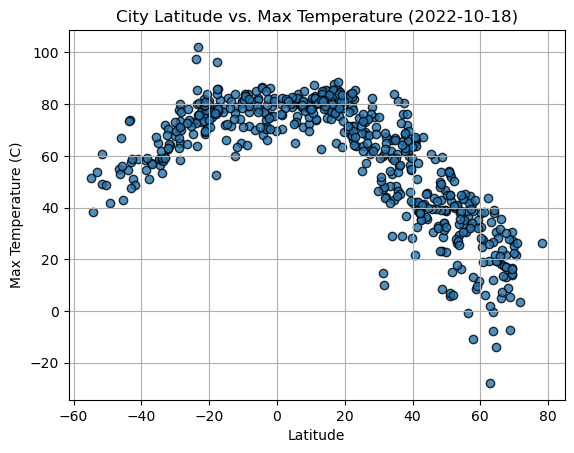

In [17]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis,y_axis,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

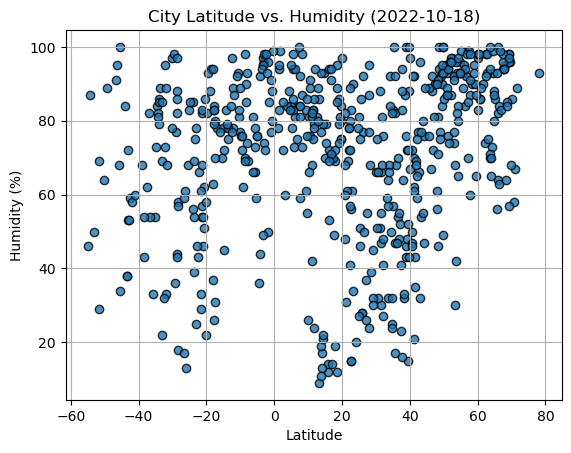

In [21]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis,y_axis,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

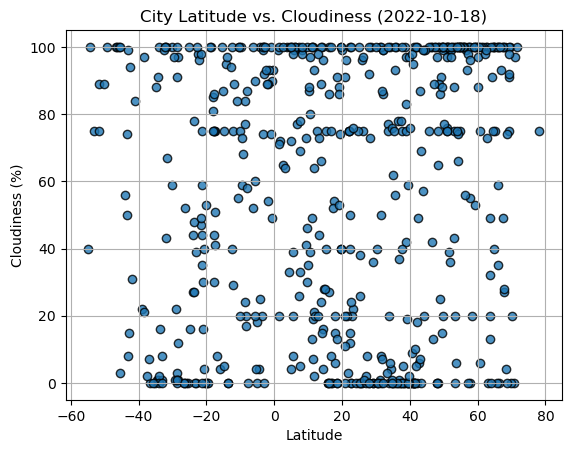

In [22]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis,y_axis,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

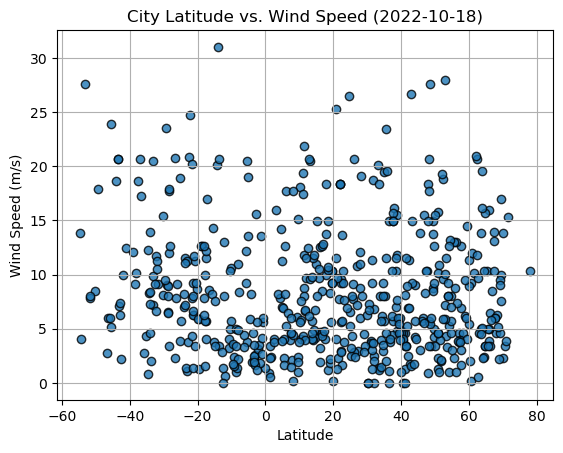

In [23]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis,y_axis,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    print(f"The r-value is: {rvalue}")
    plt.show()

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,malvan,16.0667,73.4667,79.50,72,100,4.72,IN,1699828220
2,isafjordur,66.0755,-23.1240,35.56,82,100,3.91,IS,1699827896
4,bilibino,68.0546,166.4372,8.91,95,100,4.65,RU,1699827878
5,phrai bueng,14.7483,104.3626,78.12,93,28,4.12,TH,1699828221
6,hammerfest,70.6634,23.6821,21.65,58,0,3.44,NO,1699827791


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,41.88,89,100,17.94,TF,1699827893
3,hithadhoo,-0.6000,73.0833,80.89,80,90,5.59,MV,1699827877
10,new plymouth,-39.0667,174.0833,58.32,68,22,12.12,NZ,1699827919
12,songea,-10.6833,35.6500,65.08,93,55,4.09,TZ,1699828223
13,ghanzi,-21.5667,21.7833,82.08,29,47,7.81,BW,1699828223


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8706625995128946


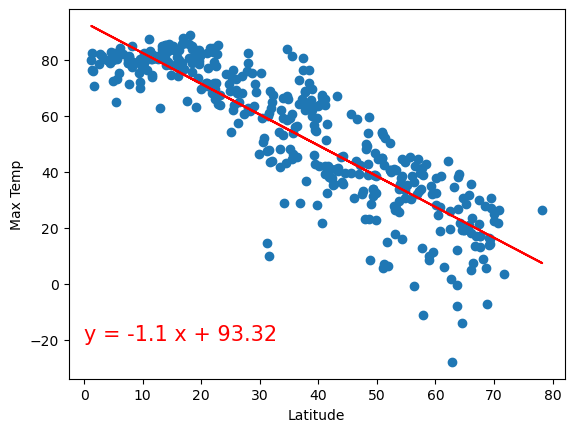

In [45]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plot_linear_regression (x_values, y_values, 'Max Temp', (0,-20))

The r-value is: 0.6974779041871499


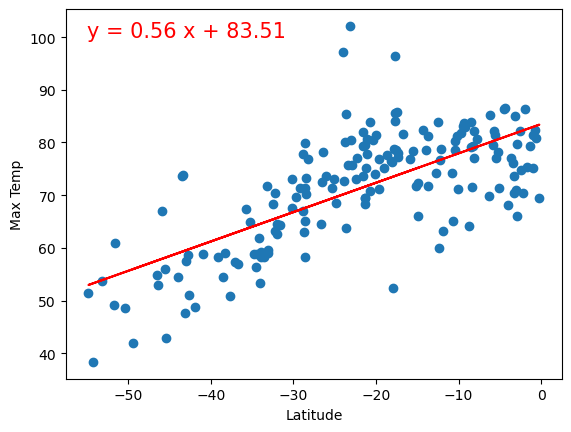

In [48]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plot_linear_regression(x_values, y_values, 'Max Temp', (-55,100))

**Discussion about the linear relationship:** In the Northern Hemisphere, the negative slope (-1.1) indicates that, on average, temperatures decrease as one moves north, with an initial temperature of approximately 93.32 degrees at the equator. This suggests a clear cooling trend with increasing latitude in the Northern Hemisphere. Conversely, in the Southern Hemisphere, the positive slope (0.56) signifies that temperatures tend to increase as one moves south, with an initial temperature of around 83.51 degrees at the equator. This implies a warming trend with decreasing latitude in the Southern Hemisphere. Overall, the data suggests a hemispheric contrast in temperature variations with latitude, with the Northern Hemisphere experiencing a cooling trend and the Southern Hemisphere exhibiting a warming trend.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.25729329065799744


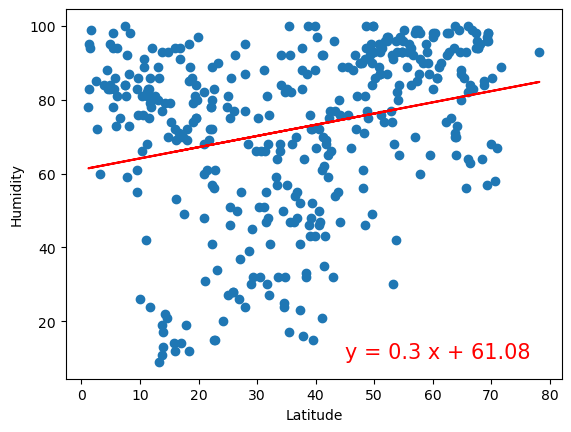

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plot_linear_regression (x_values, y_values, 'Humidity', (45,10))

The r-value is: 0.2798151392098057


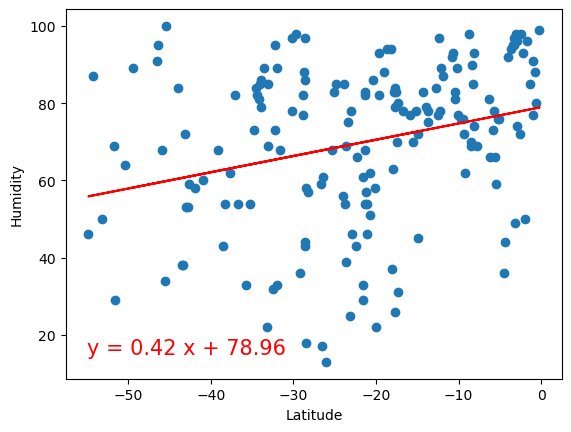

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plot_linear_regression (x_values, y_values, 'Humidity', (-55,15))

**Discussion about the linear relationship:** In the Northern Hemisphere, the positive relationship described by y = 0.3x + 61.08 indicates a gradual increase of 0.3 percentage points in humidity for each degree of latitude as one moves north. In contrast, the Southern Hemisphere demonstrates a positive linear association with y = 0.42x + 78.96, revealing a steeper increase of 0.42 percentage points in humidity per degree of latitude as one moves south. The linear relationship between the two is that the Northern Hemisphere experiences a milder increase compared to the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1521805363481308


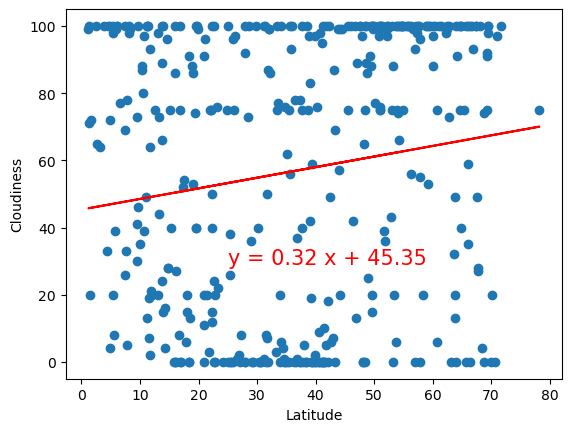

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plot_linear_regression (x_values, y_values, 'Cloudiness', (25,29))

The r-value is: 0.08653835536594288


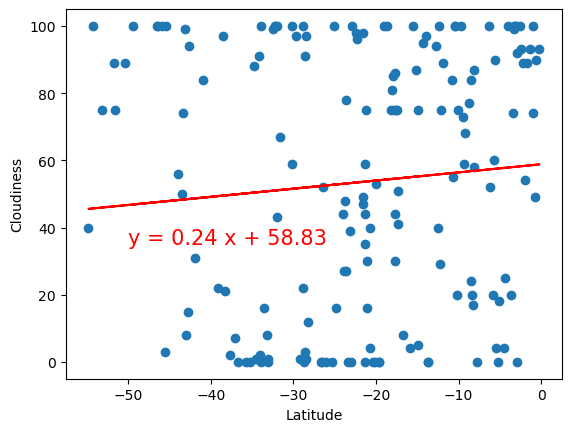

In [63]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plot_linear_regression (x_values, y_values, 'Cloudiness', (-50,35))

**Discussion about the linear relationship:** In the Northern Hemisphere, the positive linear association represented by the equation y = 0.32x + 45.35 indicates that, on average, cloudiness tends to increase by 0.32 percentage points for each degree of latitude as one moves north. In parallel, the Southern Hemisphere demonstrates a positive linear trend with y = 0.24x + 58.83, signifying a 0.24 percentage point increase in cloudiness per degree of latitude as one moves south. The linear relationship between the two is the incremental rise in cloudiness with increasing latitude in the Northern Hemisphere and decreasing latitude in the Southern Hemisphere.





### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02005028863631492


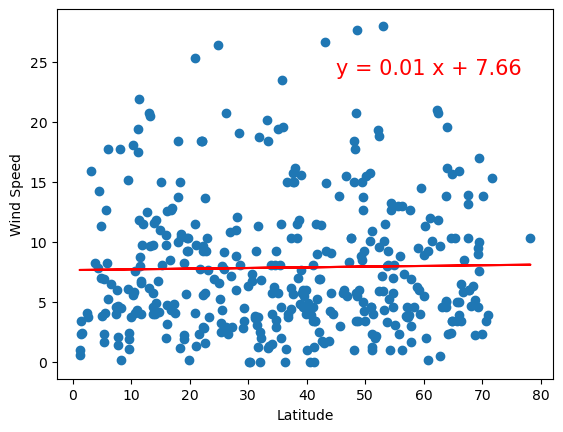

In [70]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plot_linear_regression (x_values, y_values, 'Wind Speed', (45,24))

The r-value is: -0.31056533399622593


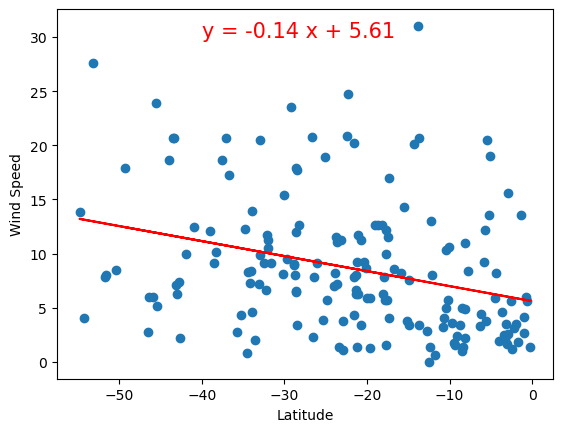

In [71]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plot_linear_regression (x_values, y_values, 'Wind Speed', (-40,30))

**Discussion about the linear relationship:** In the Northern Hemisphere, the positive linear relationship described by the equation y = 0.01x + 7.66 indicates a marginal average increase of 0.01 units in wind speed for each degree of latitude as one moves north. On the contrary, the Southern Hemisphere exhibits a negative linear association with y = -0.14x + 5.61, signifying an average decrease of 0.14 units in wind speed per degree of latitude as one moves south. The linear relationship between the two is that the Northern Hemisphere is experiencing a marginal increase and the Southern Hemisphere is showing a decrease in wind speed with latitude.